In [1]:
#Trapezoid Rule- back of the envelope
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (20, 11)
plt.rcParams.update({'font.size': 20})

def f(x):
    return np.sin(x)

def trap_plot(n_points):
    x = np.linspace(0, np.pi, 1000)          # continuous
    x_i = np.linspace(0, np.pi, n_points)    # discrete

    plt.plot(x, f(x), label=r'$\sin(x)$')
    plt.plot(x_i, f(x_i), '-o', label=r'$Trap$ ({})'.format(n_points))
    plt.fill(x_i, f(x_i), color='C1', alpha=0.15)
    plt.vlines(x_i, 0, f(x_i), color='C1', linestyle=':')
    plt.xticks(x_i, [r'$x_{}$'.format(n) for n in range(n_points)])
    plt.yticks([0, 1], ['$0$', '$1$'])
    plt.legend(loc='best')
    plt.ylim(0, 1.05)
    plt.show()

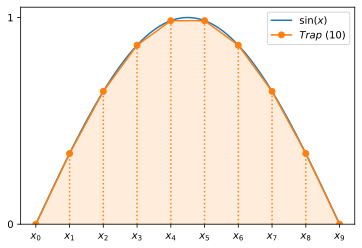

In [2]:
trap_plot(10)

In [3]:
#Getting area using consequent rule
def trap(f, x):
    """
    computes the integral of f using trapezoid rule
    """
    area = 0
    N = len(x)
    dx = x[1] - x[0]
    
    for k in range(1, N):
        area += (f(x[k - 1]) + f(x[k])) * dx / 2
        
    return area
x = np.linspace(0, np.pi, 20)
trap(f, x)

1.9954413183201944

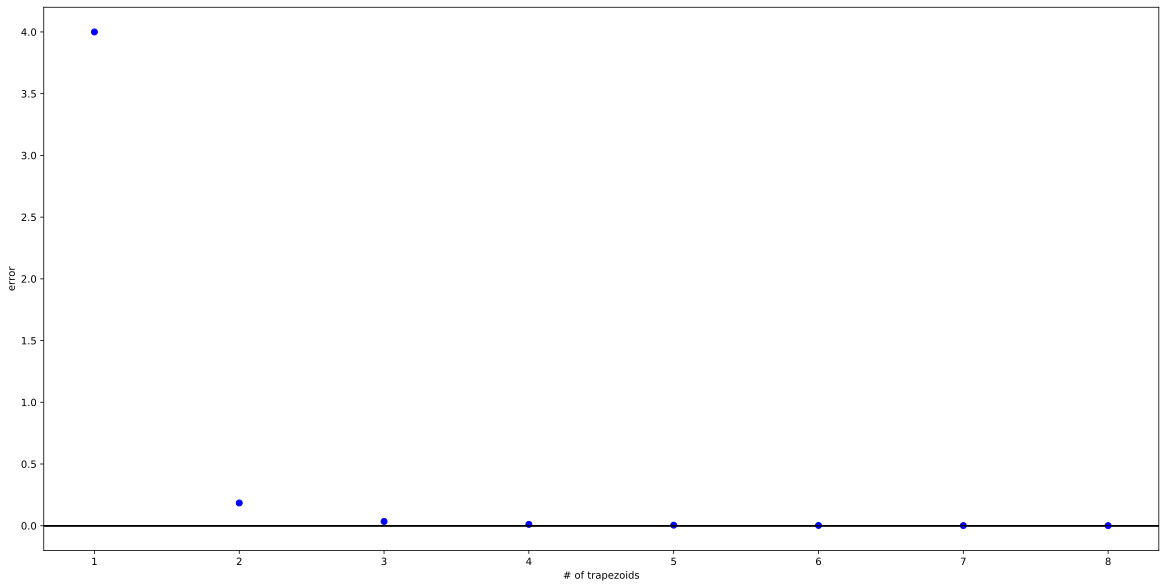

In [4]:
#What happens to error when number of trapezoids is changed?
plt.rcParams['figure.figsize'] = (20, 10)
def plot_error(n_points):
    for n in range(2, n_points):
        x = np.linspace(0, np.pi, n)
        plt.plot(n - 1, (trap(f, x) - 2) ** 2, 'bo')

        plt.axhline(0, color='black', lw=1)
        plt.xlabel('# of trapezoids')
        plt.ylabel('error')
    plt.show()
plot_error(10)

In [5]:
#using scipy
from scipy import integrate

In [ ]:
def f(x):
    """simple function to integrate"""
    return np.sin(x)


def trap(f, xmin, xmax, npoints=10):
    """
    computes the integral of f using trapezoid rule
    """
    area = 0
    x = np.linspace(xmin, xmax, npoints)
    N = len(x)
    dx = x[1] - x[0]
    
    for k in range(1, N):
        area += (f(x[k - 1]) + f(x[k])) * dx / 2
        
    return area


In [ ]:
%timeit trap(f, 0, np.pi, 1500000) - 2   # 2 is the actual integral value

In [ ]:
%timeit integrate.quad(f, 0, np.pi)